In [ ]:
## 1. View class distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size for most plots
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)

In [3]:
file_path = '../ham_concept_dataset/Datasets/metadata/metadata_ground_truth.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.head())

     lesion_id      image_id   dx dx_type   age     sex localization       dataset  benign_malignant  APC  BDG  ESA  GP  MS  MVP  None  OPC  PDES  PES  PIF  PLF  PLR  PRL  PRLC  PV  SPC  TRBL  WLSA  annotator
0  HAM_0005678  ISIC_0031023  mel   histo  60.0    male        chest  vidir_modern                 1    0    1    0   1   0    0     0    0     0    0    0    0    0    1     0   0    0     1     1          1
1  HAM_0005191  ISIC_0031177  mel   histo  40.0  female         back     rosendahl                 1    0    1    0   1   0    0     0    0     0    0    0    0    0    0     0   0    0     1     0          1
2  HAM_0007310  ISIC_0026120  mel   histo  55.0    male         back  vidir_modern                 1    0    1    0   1   0    0     0    0     0    0    0    0    0    0     0   1    0     1     1          1
3  HAM_0004476  ISIC_0030417  mel   histo  70.0    male         face  vidir_modern                 1    0    1    0   1   0    0     0    0     0    0    0    0    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lesion_id         6498 non-null   object 
 1   image_id          6498 non-null   object 
 2   dx                6498 non-null   object 
 3   dx_type           6498 non-null   object 
 4   age               6482 non-null   float64
 5   sex               6498 non-null   object 
 6   localization      6498 non-null   object 
 7   dataset           6498 non-null   object 
 8   benign_malignant  6498 non-null   int64  
 9   APC               6498 non-null   int64  
 10  BDG               6498 non-null   int64  
 11  ESA               6498 non-null   int64  
 12  GP                6498 non-null   int64  
 13  MS                6498 non-null   int64  
 14  MVP               6498 non-null   int64  
 15  None              6498 non-null   int64  
 16  OPC               6498 non-null   int64  


In [6]:
print(df.select_dtypes(include=np.number).describe())

               age  benign_malignant          APC          BDG          ESA           GP           MS          MVP         None          OPC         PDES          PES          PIF          PLF          PLR          PRL         PRLC           PV          SPC         TRBL         WLSA    annotator
count  6482.000000       6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000
mean     50.719685          0.356263     0.381348     0.190058     0.126654     0.216528     0.438904     0.015851     0.057402     0.072484     0.001539     0.002308     0.014774     0.012927     0.003386     0.056017     0.045245     0.104955     0.135580     0.213912     0.129886     3.911511
std      18.619488          0.478931     0.485755     0.392377     0.332611     0.411910     0.496291     0.1

In [7]:
print(df.describe(include=['object', 'category', 'bool']))

          lesion_id      image_id    dx dx_type   sex localization       dataset
count          6498          6498  6498    6498  6498         6498          6498
unique         1981          3611     2       1     3           15             4
top     HAM_0007343  ISIC_0033856    nv   histo  male         back  vidir_modern
freq             11             3  4183    6498  3556         1986          3495


In [9]:
missing_values = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_values_percent
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))


     Missing Count  Missing Percentage
age             16             0.24623


In [10]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Numerical columns found: ['age', 'benign_malignant', 'APC', 'BDG', 'ESA', 'GP', 'MS', 'MVP', 'None', 'OPC', 'PDES', 'PES', 'PIF', 'PLF', 'PLR', 'PRL', 'PRLC', 'PV', 'SPC', 'TRBL', 'WLSA', 'annotator']


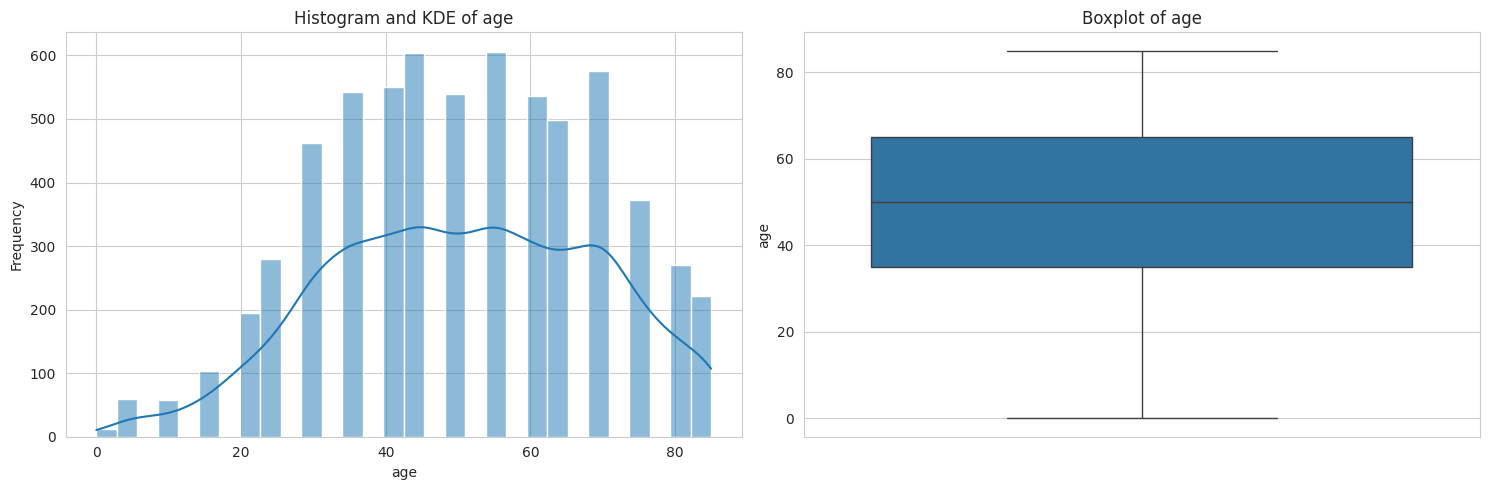


Descriptive stats for age:
count    6482.000000
mean       50.719685
std        18.619488
min         0.000000
25%        35.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64
Skewness: -0.15
Kurtosis: -0.66


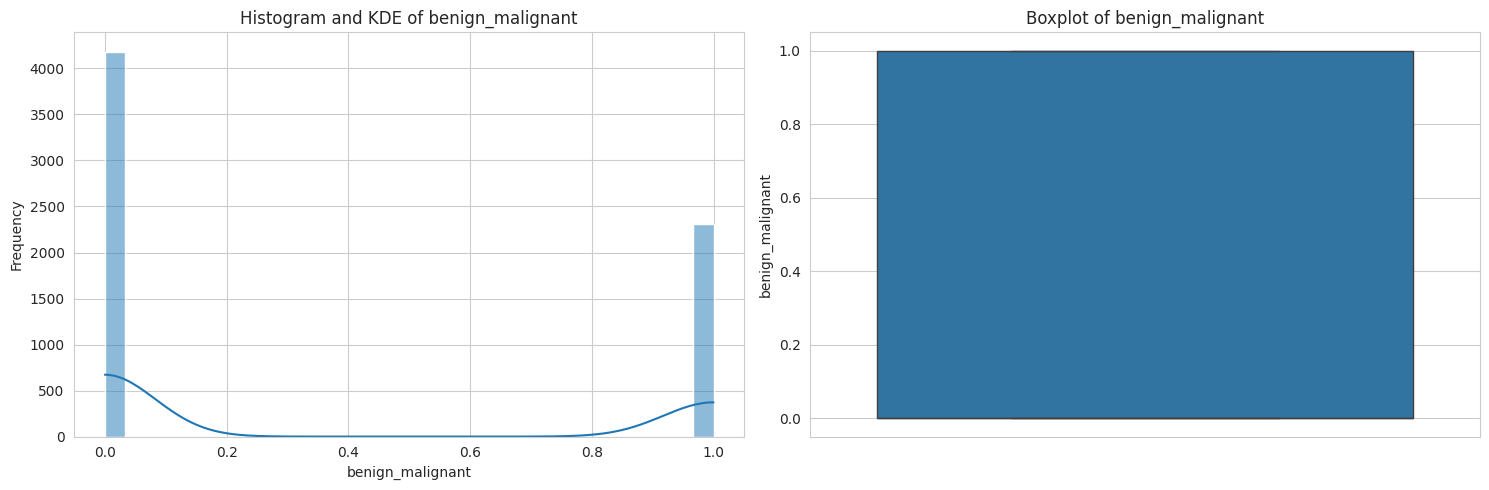


Descriptive stats for benign_malignant:
count    6498.000000
mean        0.356263
std         0.478931
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: benign_malignant, dtype: float64
Skewness: 0.60
Kurtosis: -1.64


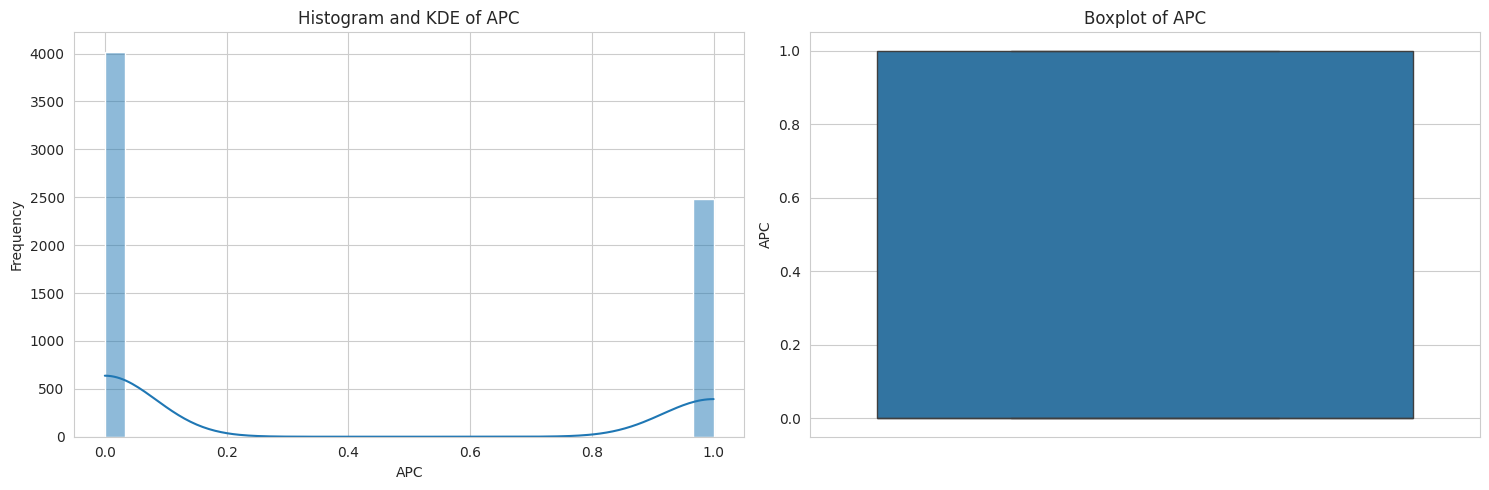


Descriptive stats for APC:
count    6498.000000
mean        0.381348
std         0.485755
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: APC, dtype: float64
Skewness: 0.49
Kurtosis: -1.76


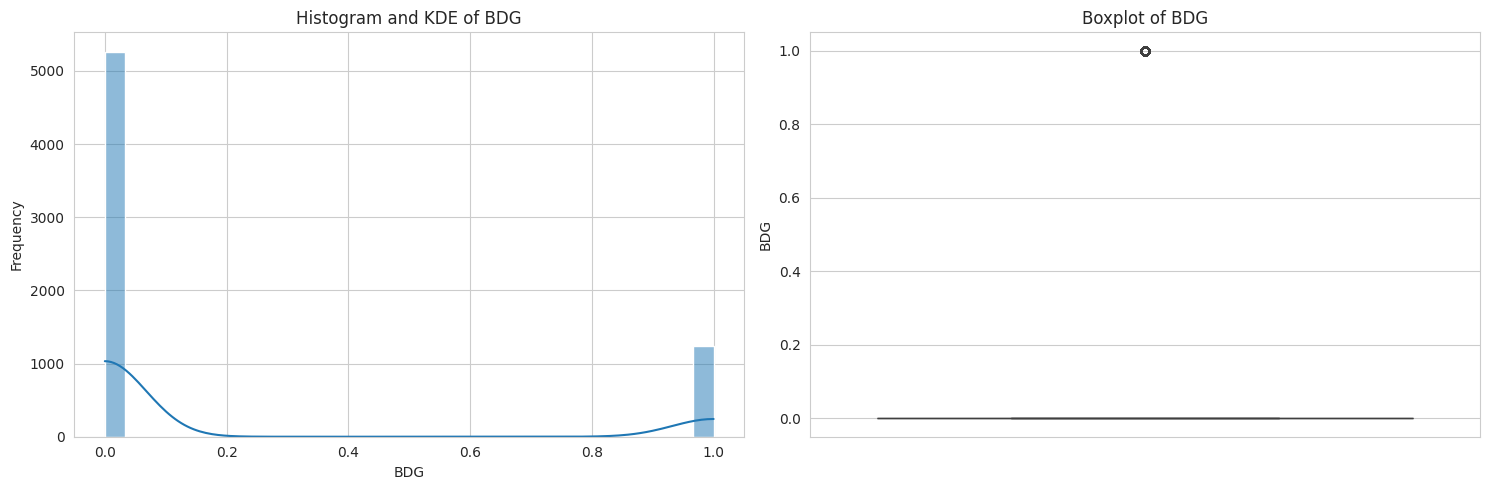


Descriptive stats for BDG:
count    6498.000000
mean        0.190058
std         0.392377
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BDG, dtype: float64
Skewness: 1.58
Kurtosis: 0.50


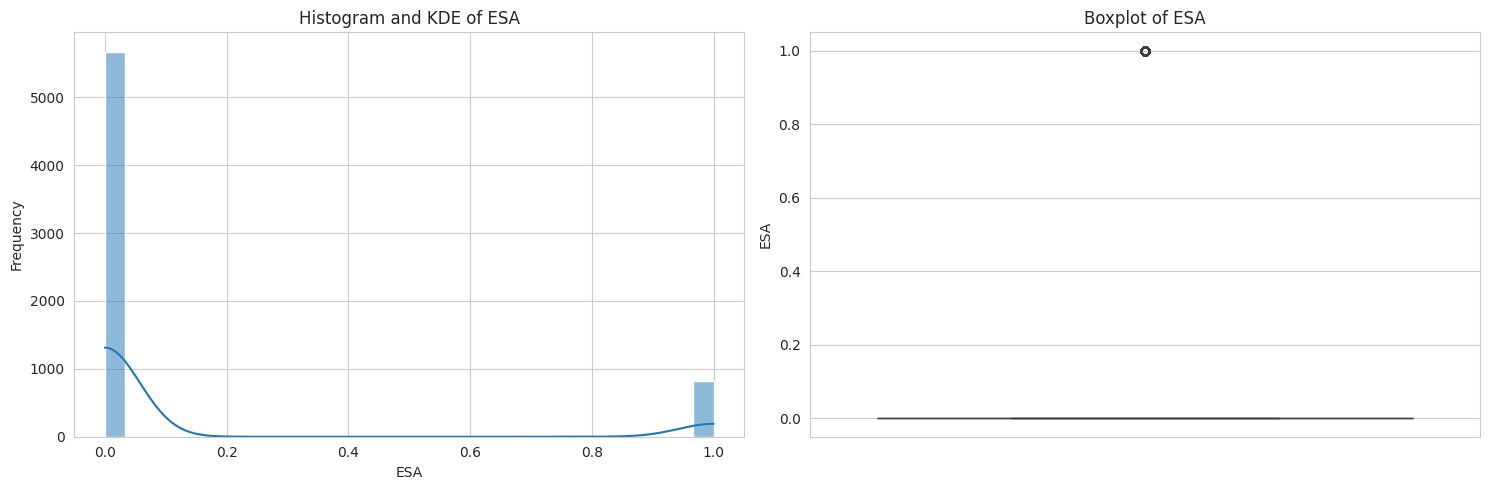


Descriptive stats for ESA:
count    6498.000000
mean        0.126654
std         0.332611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ESA, dtype: float64
Skewness: 2.25
Kurtosis: 3.04


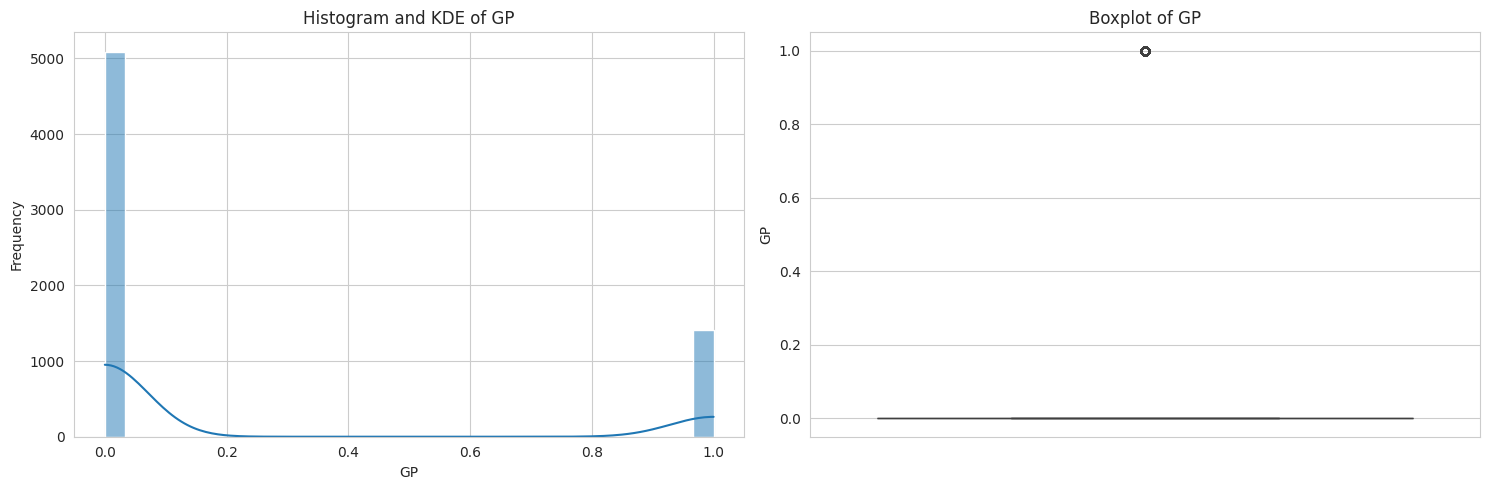


Descriptive stats for GP:
count    6498.000000
mean        0.216528
std         0.411910
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: GP, dtype: float64
Skewness: 1.38
Kurtosis: -0.10


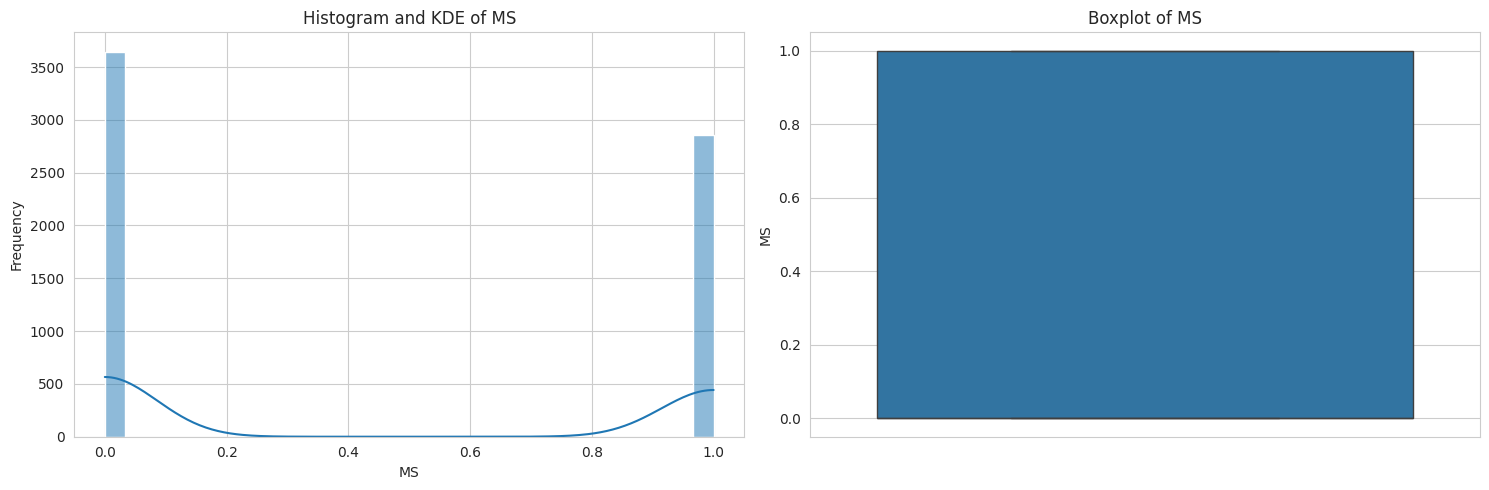


Descriptive stats for MS:
count    6498.000000
mean        0.438904
std         0.496291
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: MS, dtype: float64
Skewness: 0.25
Kurtosis: -1.94


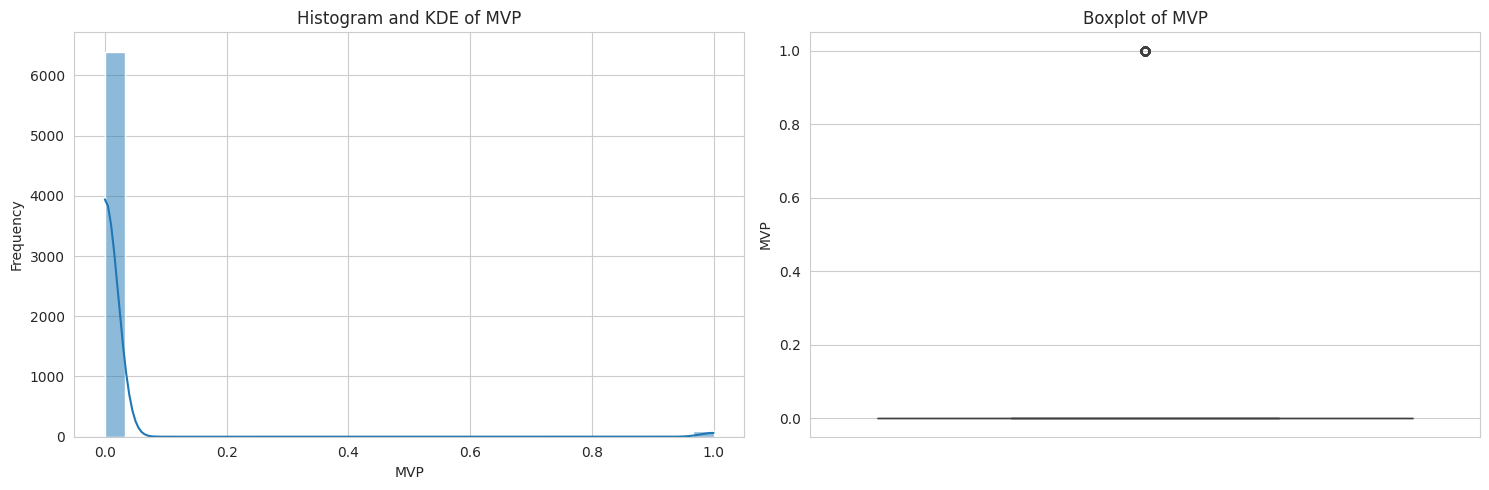


Descriptive stats for MVP:
count    6498.000000
mean        0.015851
std         0.124909
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: MVP, dtype: float64
Skewness: 7.75
Kurtosis: 58.15


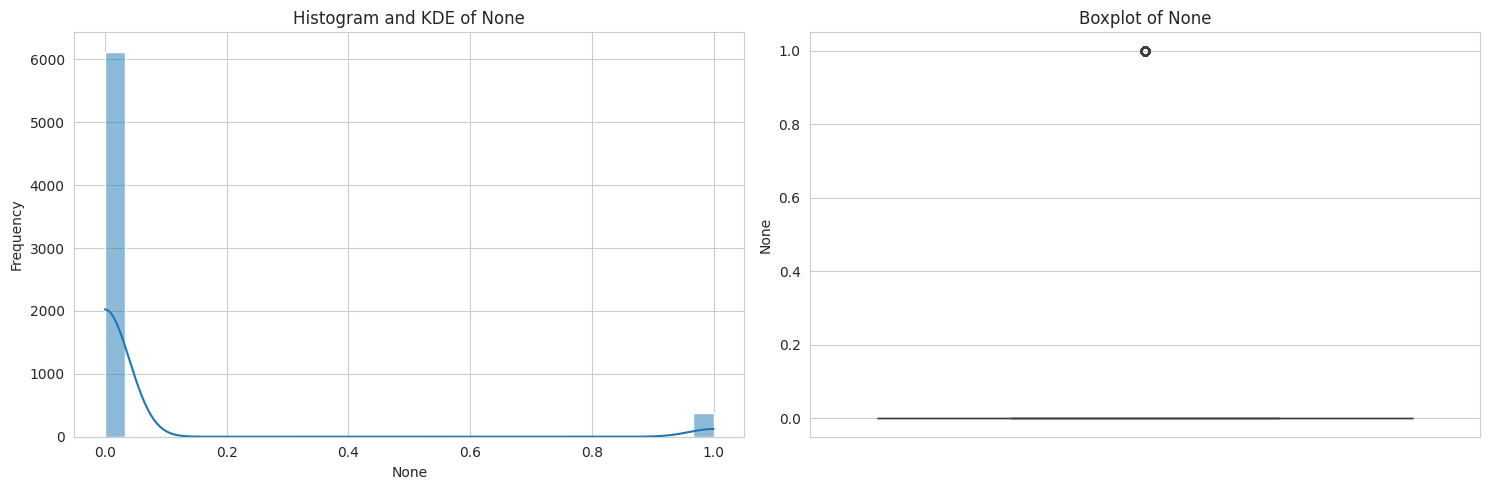


Descriptive stats for None:
count    6498.000000
mean        0.057402
std         0.232628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: None, dtype: float64
Skewness: 3.81
Kurtosis: 12.49


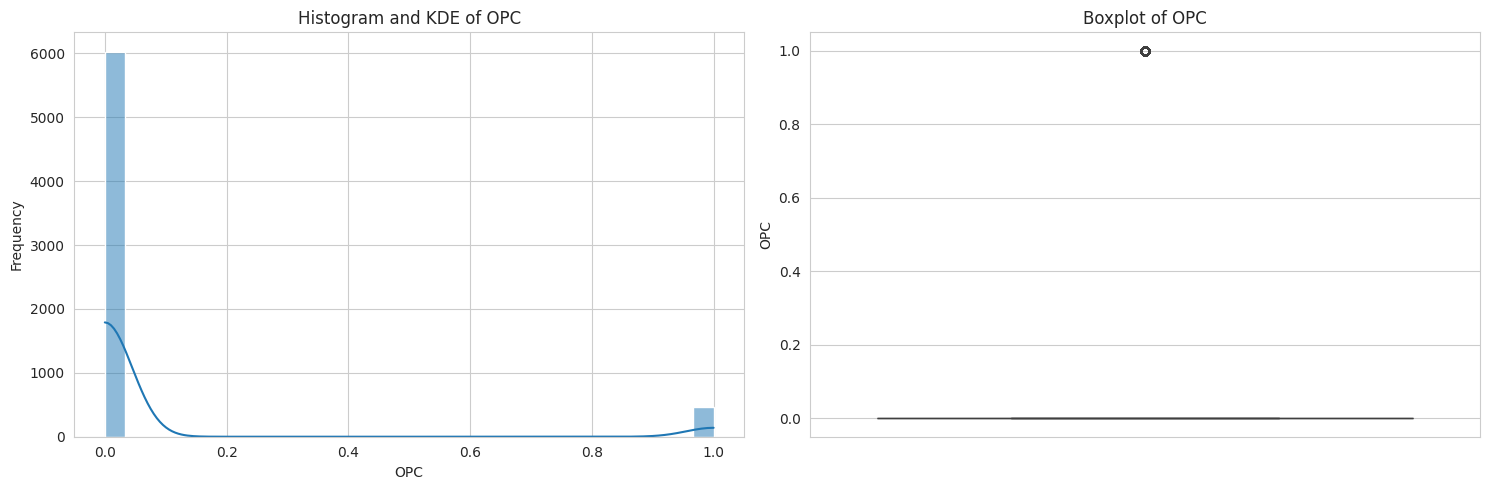


Descriptive stats for OPC:
count    6498.000000
mean        0.072484
std         0.259307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: OPC, dtype: float64
Skewness: 3.30
Kurtosis: 8.88


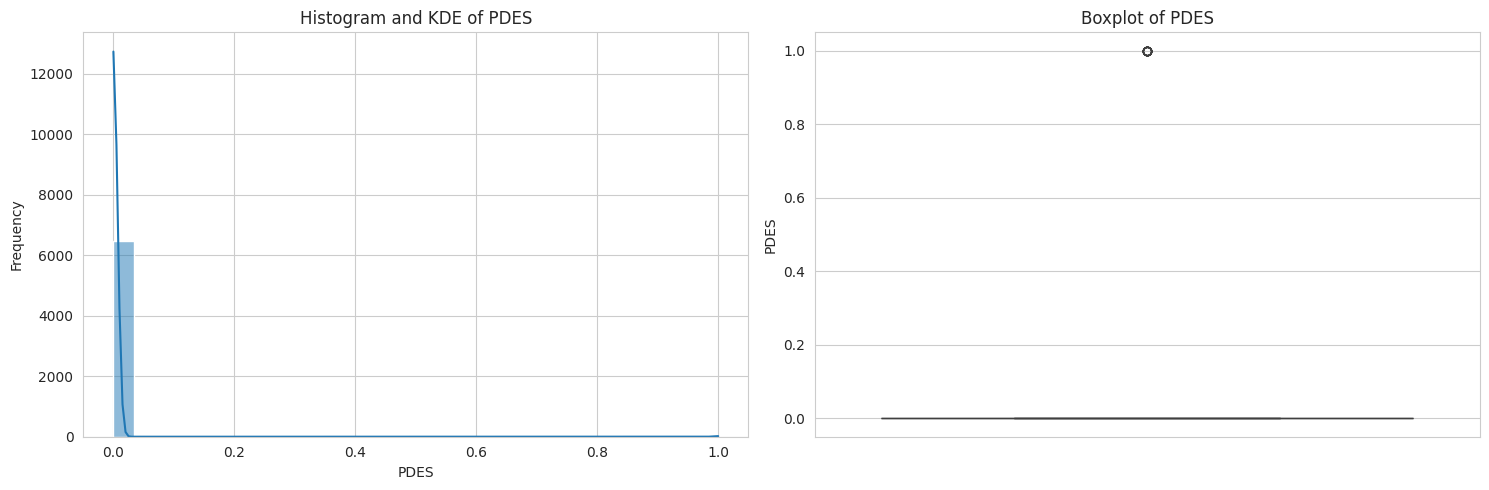


Descriptive stats for PDES:
count    6498.000000
mean        0.001539
std         0.039202
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PDES, dtype: float64
Skewness: 25.44
Kurtosis: 645.30


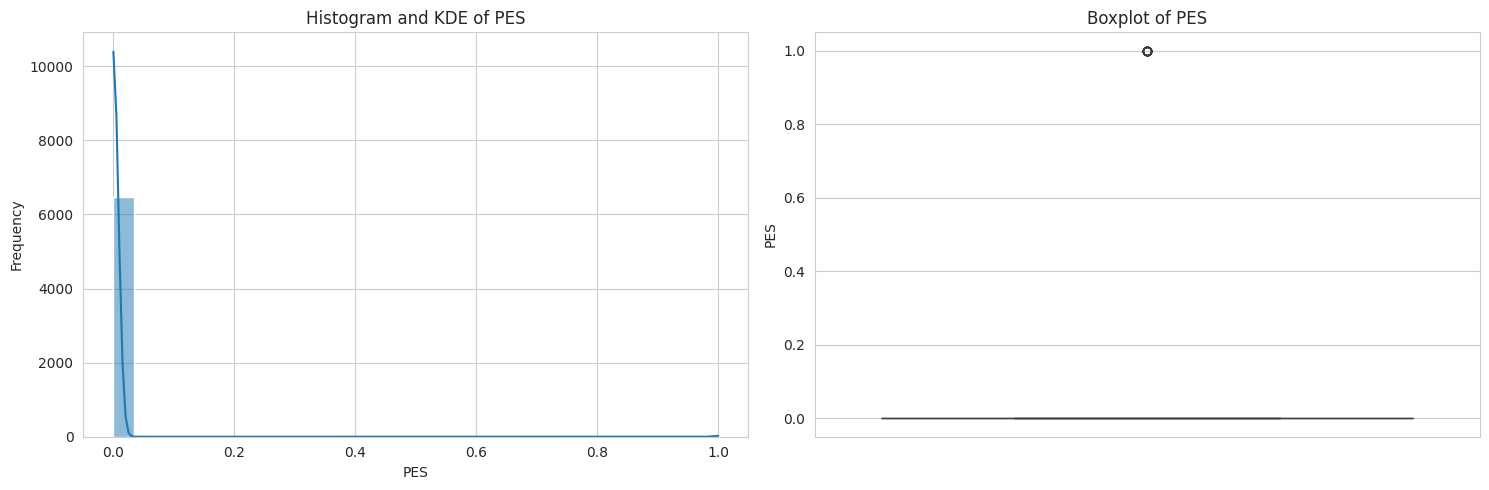


Descriptive stats for PES:
count    6498.000000
mean        0.002308
std         0.047994
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PES, dtype: float64
Skewness: 20.75
Kurtosis: 428.53


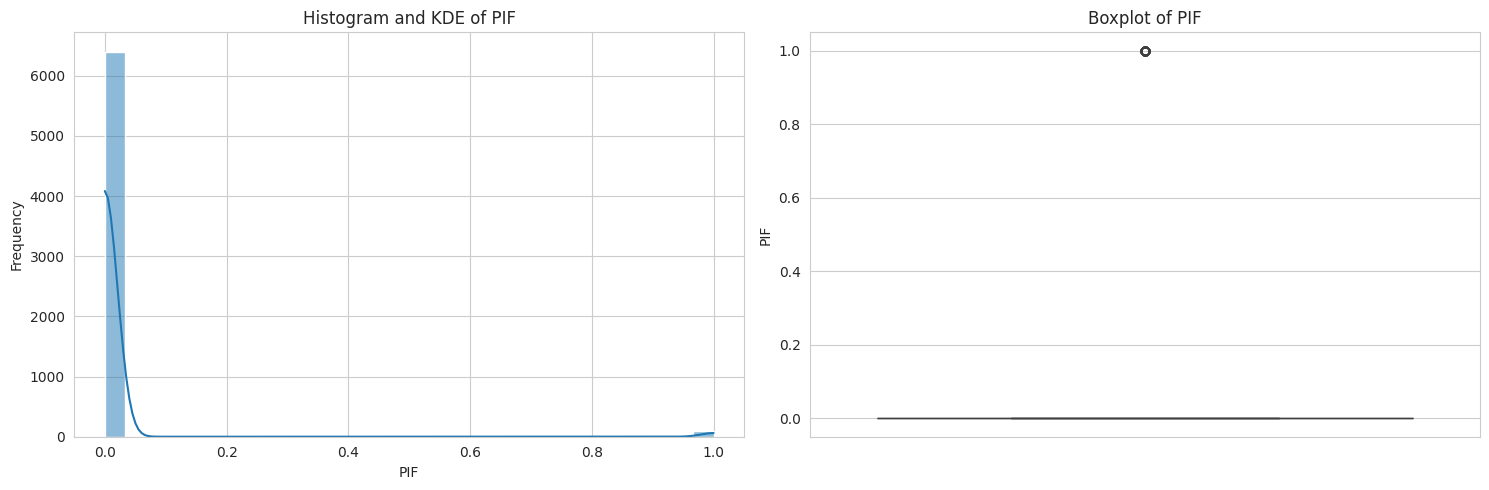


Descriptive stats for PIF:
count    6498.000000
mean        0.014774
std         0.120656
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PIF, dtype: float64
Skewness: 8.05
Kurtosis: 62.75


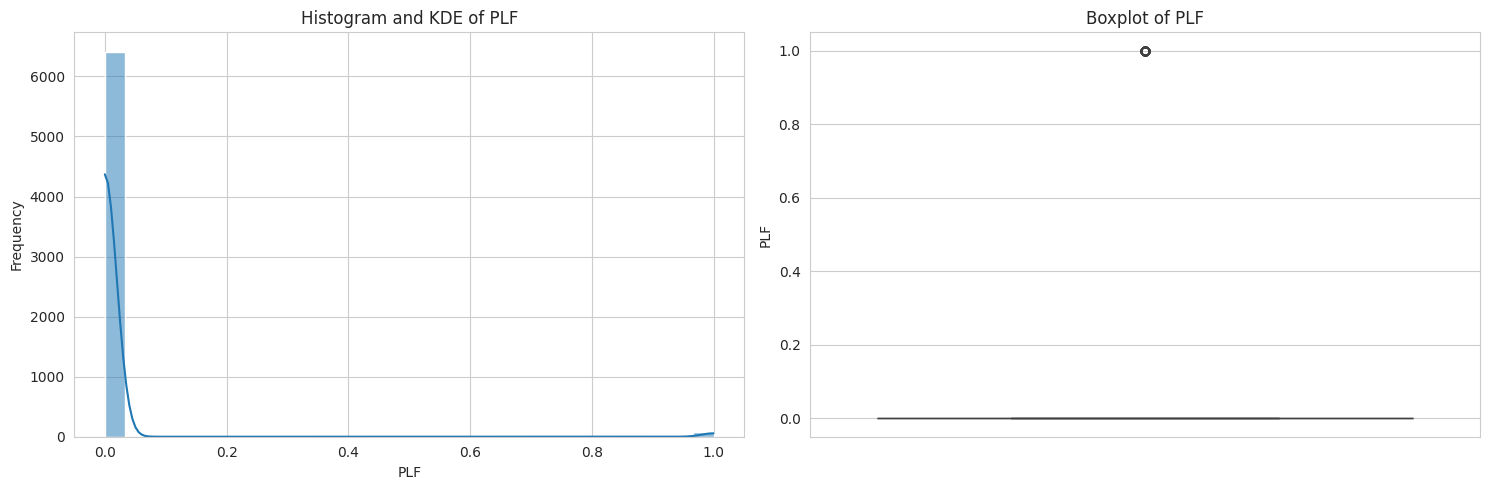


Descriptive stats for PLF:
count    6498.000000
mean        0.012927
std         0.112969
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PLF, dtype: float64
Skewness: 8.63
Kurtosis: 72.43


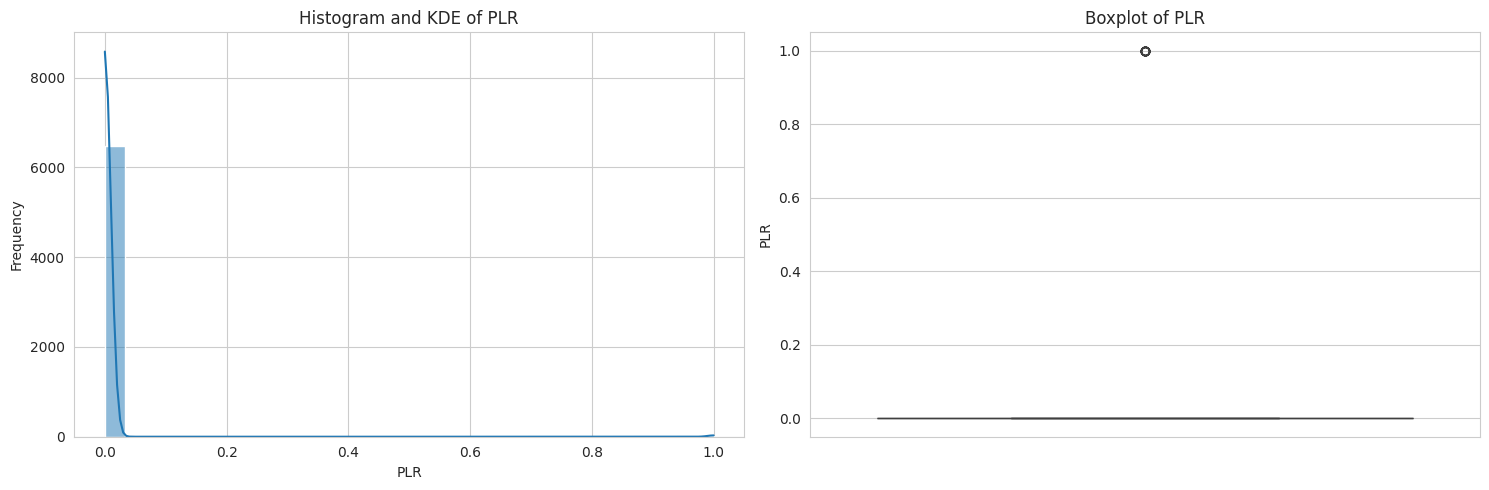


Descriptive stats for PLR:
count    6498.000000
mean        0.003386
std         0.058092
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PLR, dtype: float64
Skewness: 17.10
Kurtosis: 290.59


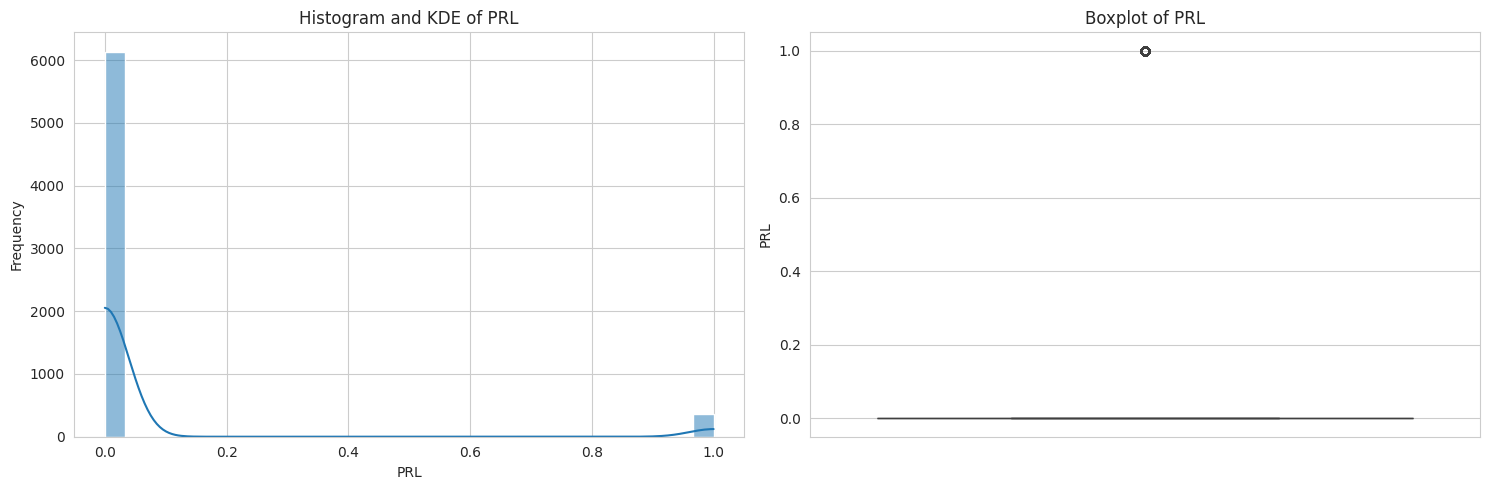


Descriptive stats for PRL:
count    6498.000000
mean        0.056017
std         0.229973
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PRL, dtype: float64
Skewness: 3.86
Kurtosis: 12.92


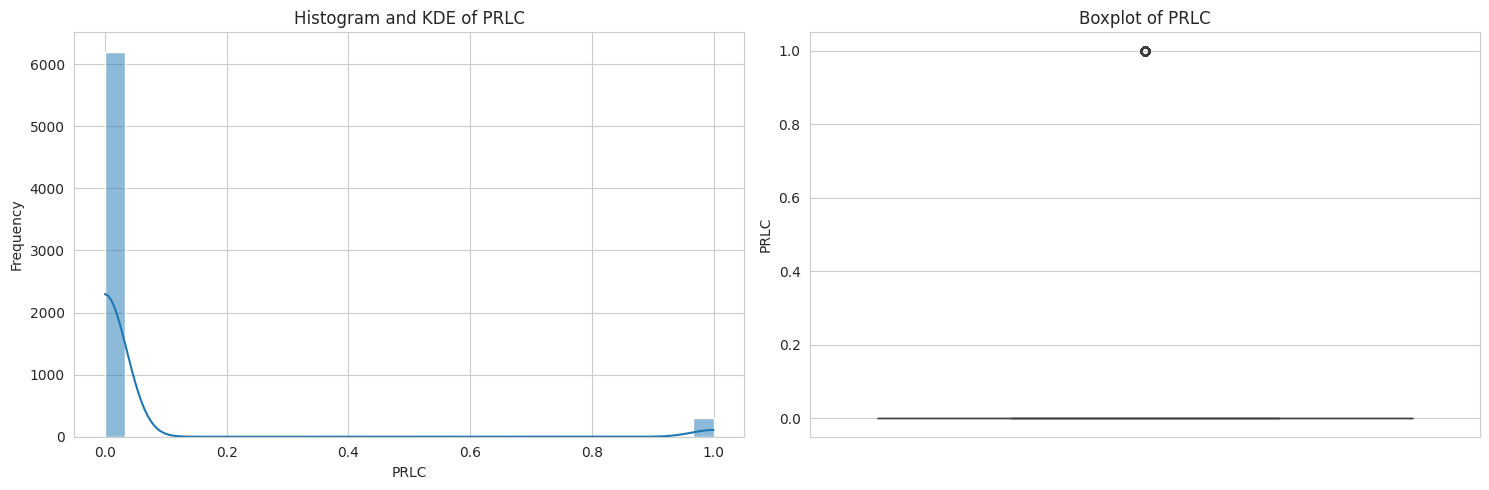


Descriptive stats for PRLC:
count    6498.000000
mean        0.045245
std         0.207856
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PRLC, dtype: float64
Skewness: 4.38
Kurtosis: 17.16


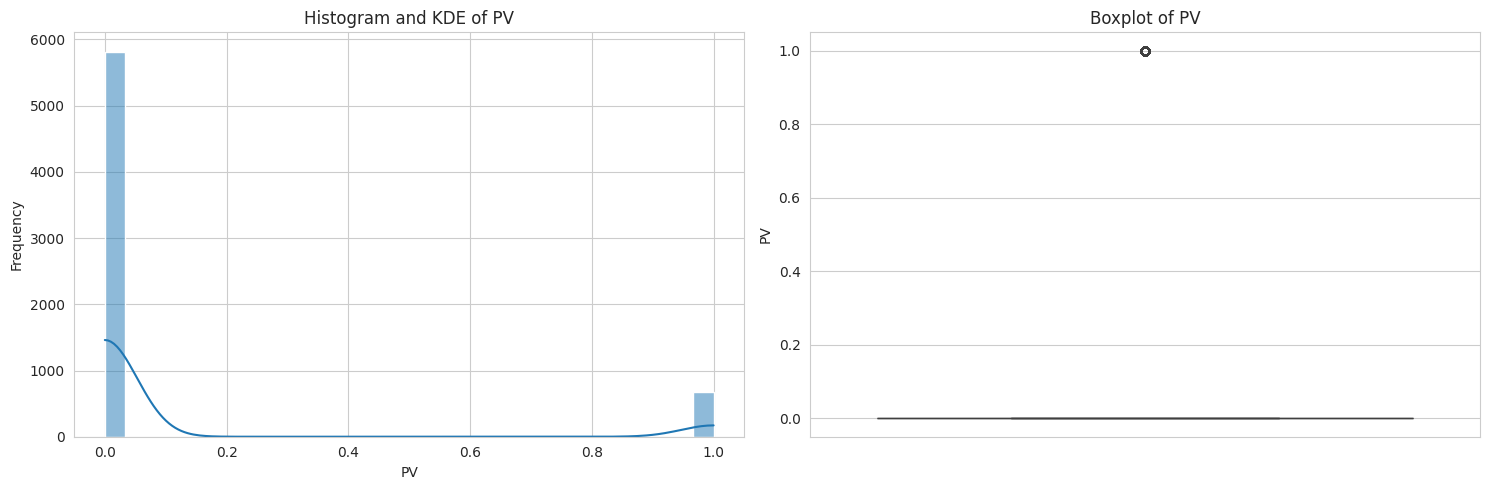


Descriptive stats for PV:
count    6498.000000
mean        0.104955
std         0.306519
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PV, dtype: float64
Skewness: 2.58
Kurtosis: 4.65


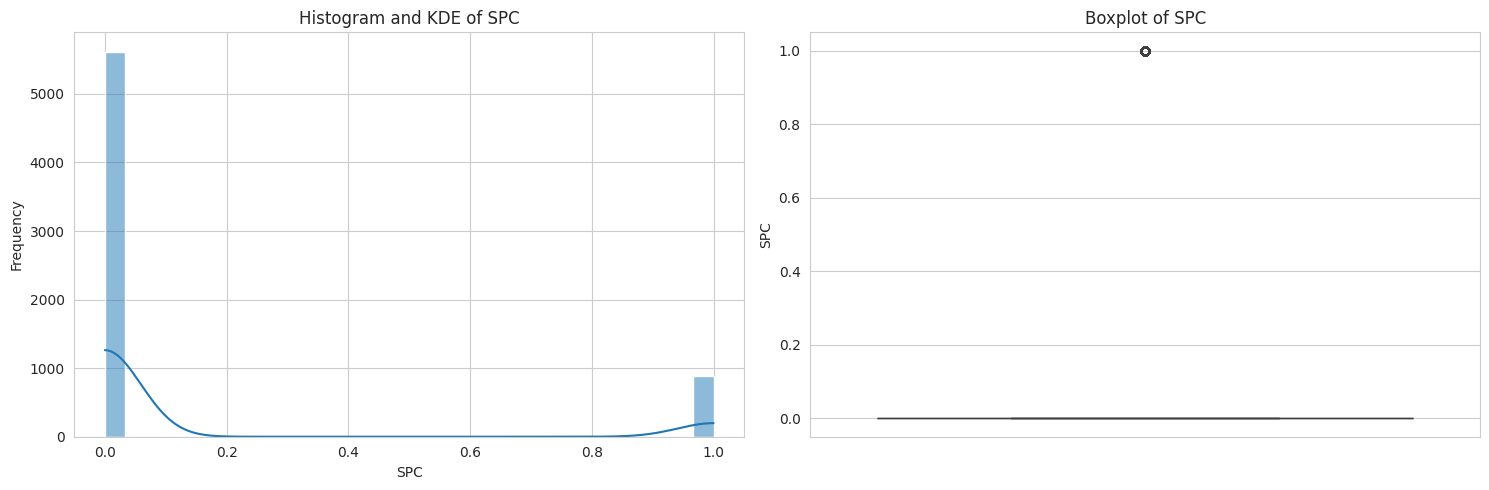


Descriptive stats for SPC:
count    6498.000000
mean        0.135580
std         0.342369
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SPC, dtype: float64
Skewness: 2.13
Kurtosis: 2.54


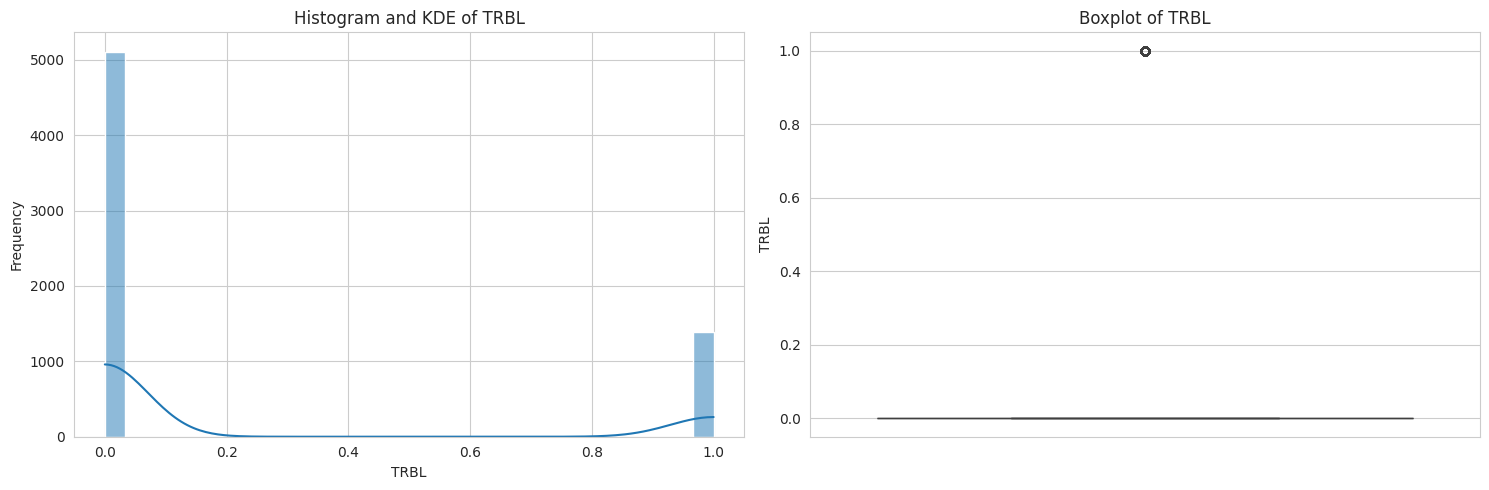


Descriptive stats for TRBL:
count    6498.000000
mean        0.213912
std         0.410097
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TRBL, dtype: float64
Skewness: 1.40
Kurtosis: -0.05


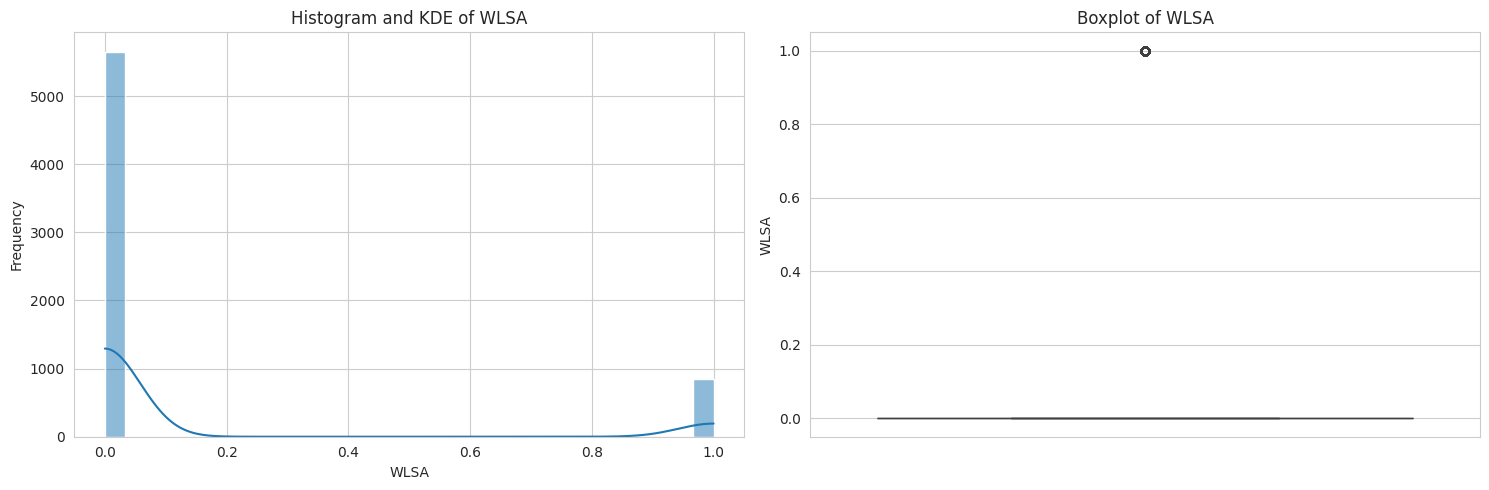


Descriptive stats for WLSA:
count    6498.000000
mean        0.129886
std         0.336204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: WLSA, dtype: float64
Skewness: 2.20
Kurtosis: 2.85


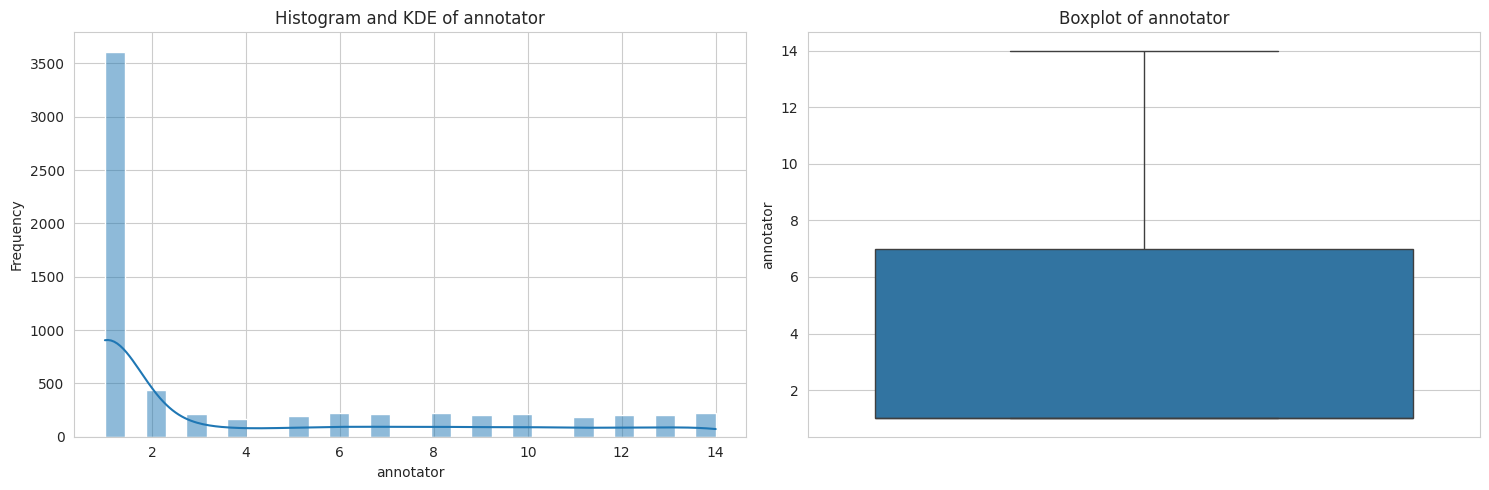


Descriptive stats for annotator:
count    6498.000000
mean        3.911511
std         4.184783
min         1.000000
25%         1.000000
50%         1.000000
75%         7.000000
max        14.000000
Name: annotator, dtype: float64
Skewness: 1.16
Kurtosis: -0.11


In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if not numerical_cols:
    print("No numerical columns found for distribution plots.")
else:
    print(f"Numerical columns found: {numerical_cols}")
    for col in numerical_cols:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram and KDE of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()

        print(f"\nDescriptive stats for {col}:")
        print(df[col].describe())
        print(f"Skewness: {df[col].skew():.2f}")
        print(f"Kurtosis: {df[col].kurt():.2f}")

Categorical/Boolean columns found: ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization', 'dataset']

--- Value Counts for lesion_id (Top 20) ---
lesion_id
HAM_0007343    11
HAM_0001863    11
HAM_0003700     9
HAM_0002824     9
HAM_0006330     8
HAM_0003033     8
HAM_0005755     7
HAM_0006453     7
HAM_0004129     7
HAM_0007558     7
HAM_0000388     7
HAM_0000611     7
HAM_0002671     7
HAM_0004811     7
HAM_0005893     7
HAM_0003602     7
HAM_0003566     7
HAM_0003556     7
HAM_0004240     7
HAM_0004927     7
Name: count, dtype: int64
... and 1961 more unique values.
Column 'lesion_id' has too many unique values (1981) to plot a count plot effectively. Displaying top 10.


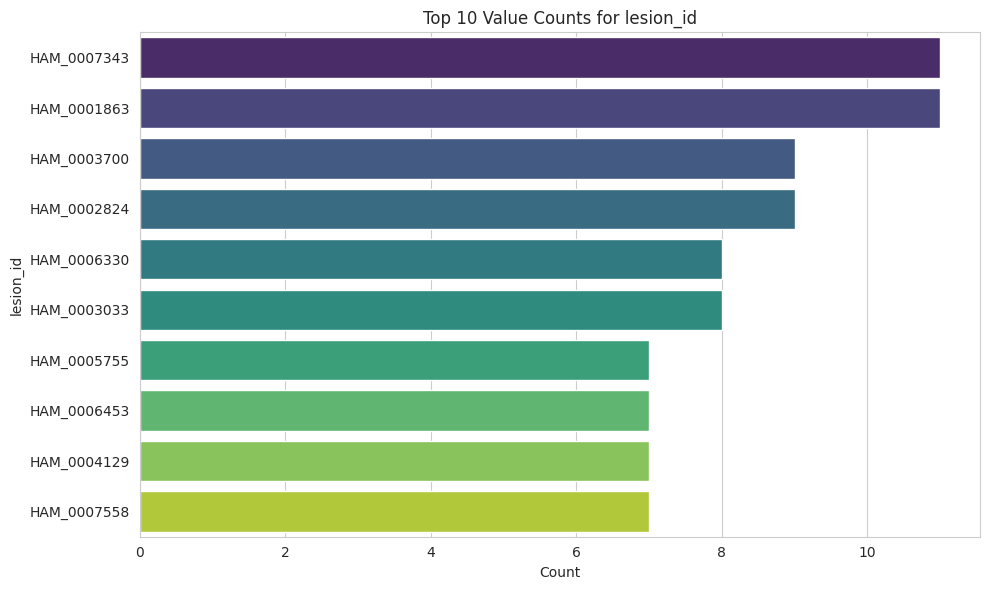


--- Value Counts for image_id (Top 20) ---
image_id
ISIC_0033856    3
ISIC_0033300    3
ISIC_0032873    3
ISIC_0024481    3
ISIC_0031953    3
ISIC_0031642    3
ISIC_0027043    3
ISIC_0027872    3
ISIC_0032656    3
ISIC_0033498    3
ISIC_0033773    3
ISIC_0034284    3
ISIC_0032517    3
ISIC_0033171    3
ISIC_0033415    3
ISIC_0028505    3
ISIC_0031598    3
ISIC_0032190    3
ISIC_0026314    3
ISIC_0026950    3
Name: count, dtype: int64
... and 3591 more unique values.
Column 'image_id' has too many unique values (3611) to plot a count plot effectively. Displaying top 10.


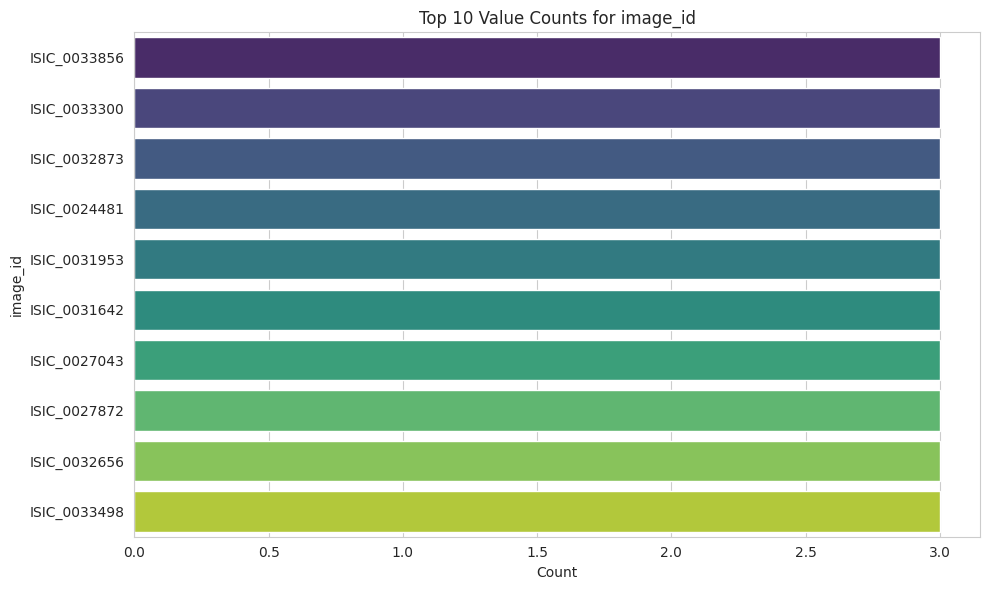


--- Value Counts for dx (Top 20) ---
dx
nv     4183
mel    2315
Name: count, dtype: int64


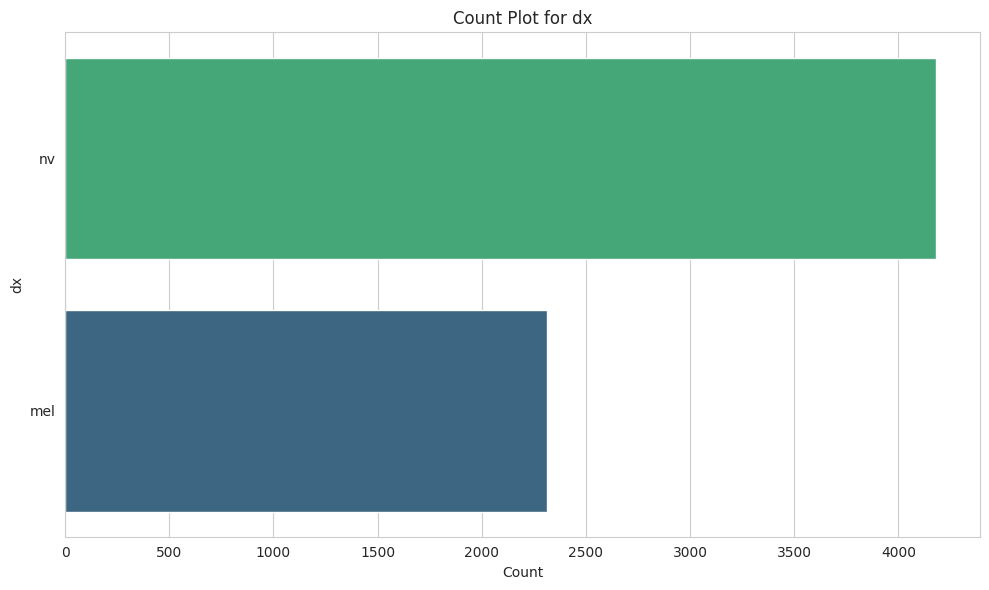


--- Value Counts for dx_type (Top 20) ---
dx_type
histo    6498
Name: count, dtype: int64
Column 'dx_type' has only one unique value (including NaNs if present): histo

--- Value Counts for sex (Top 20) ---
sex
male       3556
female     2928
unknown      14
Name: count, dtype: int64


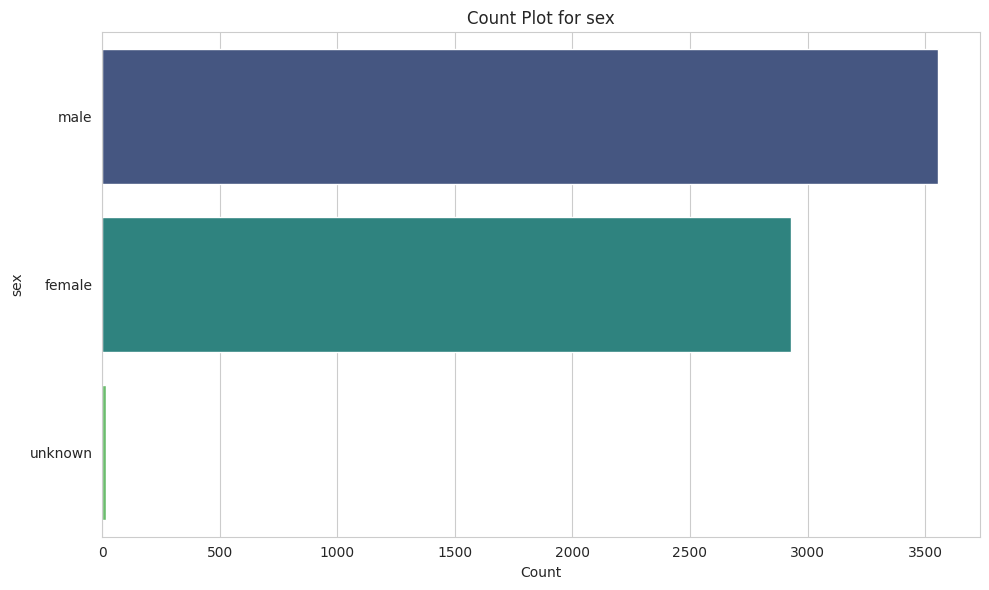


--- Value Counts for localization (Top 20) ---
localization
back               1986
lower extremity    1161
upper extremity     918
abdomen             560
chest               415
trunk               375
face                347
foot                295
neck                134
scalp                88
ear                  76
unknown              68
hand                 53
genital              12
acral                10
Name: count, dtype: int64


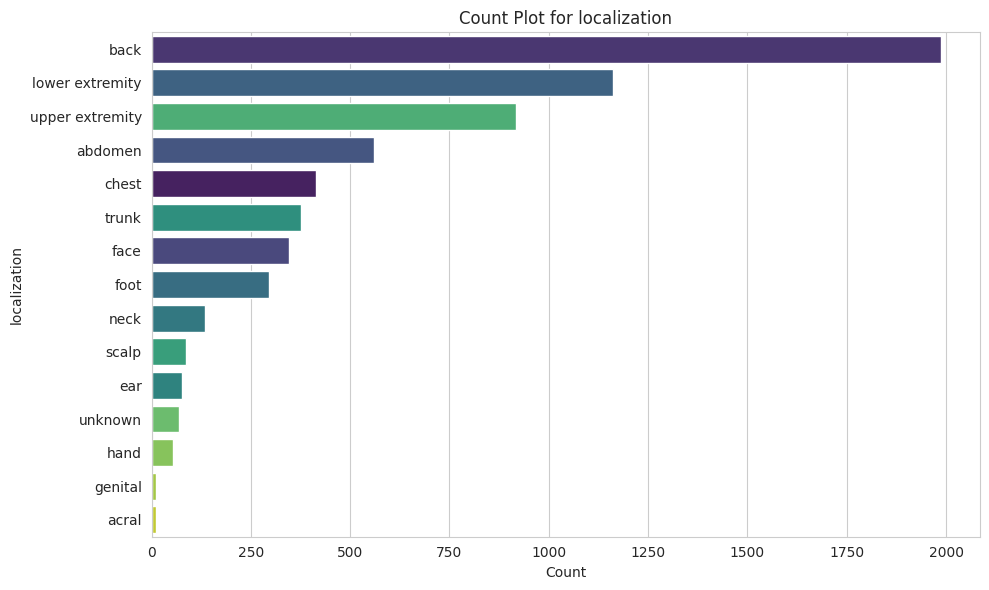


--- Value Counts for dataset (Top 20) ---
dataset
vidir_modern     3495
rosendahl        2158
vienna_dias       759
vidir_molemax      86
Name: count, dtype: int64


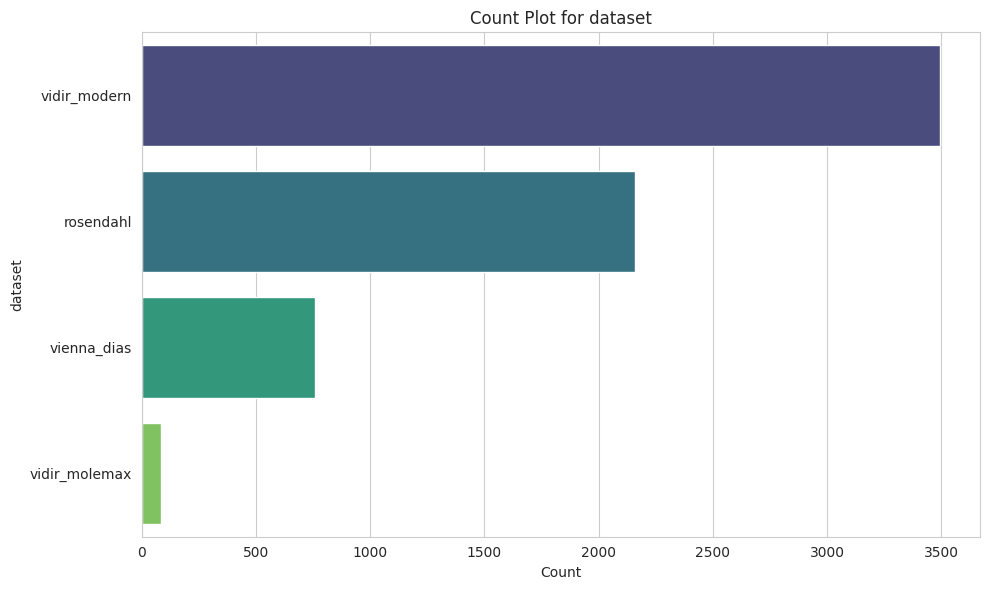

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

if not categorical_cols:
    print("No categorical or boolean columns found for count plots.")
else:
    print(f"Categorical/Boolean columns found: {categorical_cols}")
    for col in categorical_cols:
        print(f"\n--- Value Counts for {col} (Top 20) ---")
        # For high cardinality features, show top N and possibly 'Others'
        value_counts = df[col].value_counts(dropna=False) # include NaNs in counts
        print(value_counts.head(20))
        if len(value_counts) > 20:
            print(f"... and {len(value_counts) - 20} more unique values.")

        # Plot if unique values are manageable (e.g., less than 30)
        # and more than 1 unique value (otherwise plot is not informative)
        if 1 < df[col].nunique(dropna=False) <= 30 :
            plt.figure(figsize=(10, max(6, df[col].nunique(dropna=False) * 0.3))) # Adjust height based on num categories
            try:
                sns.countplot(y=df[col], order=value_counts.index, palette='viridis', hue=df[col], legend=False)
            except Exception: # Fallback if hue causes issues with specific data types/versions
                 sns.countplot(y=df[col], order=value_counts.index, palette='viridis')
            plt.title(f'Count Plot for {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
        elif df[col].nunique(dropna=False) == 1:
            print(f"Column '{col}' has only one unique value (including NaNs if present): {df[col].unique()[0]}")
        elif df[col].nunique(dropna=False) > 30:
            print(f"Column '{col}' has too many unique values ({df[col].nunique(dropna=False)}) to plot a count plot effectively. Displaying top 10.")
            plt.figure(figsize=(10, 6))
            top_n = value_counts.head(10)
            try:
                sns.barplot(x=top_n.values, y=top_n.index, palette='viridis', hue=top_n.index, legend=False)
            except Exception:
                sns.barplot(x=top_n.values, y=top_n.index, palette='viridis')
            plt.title(f'Top 10 Value Counts for {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

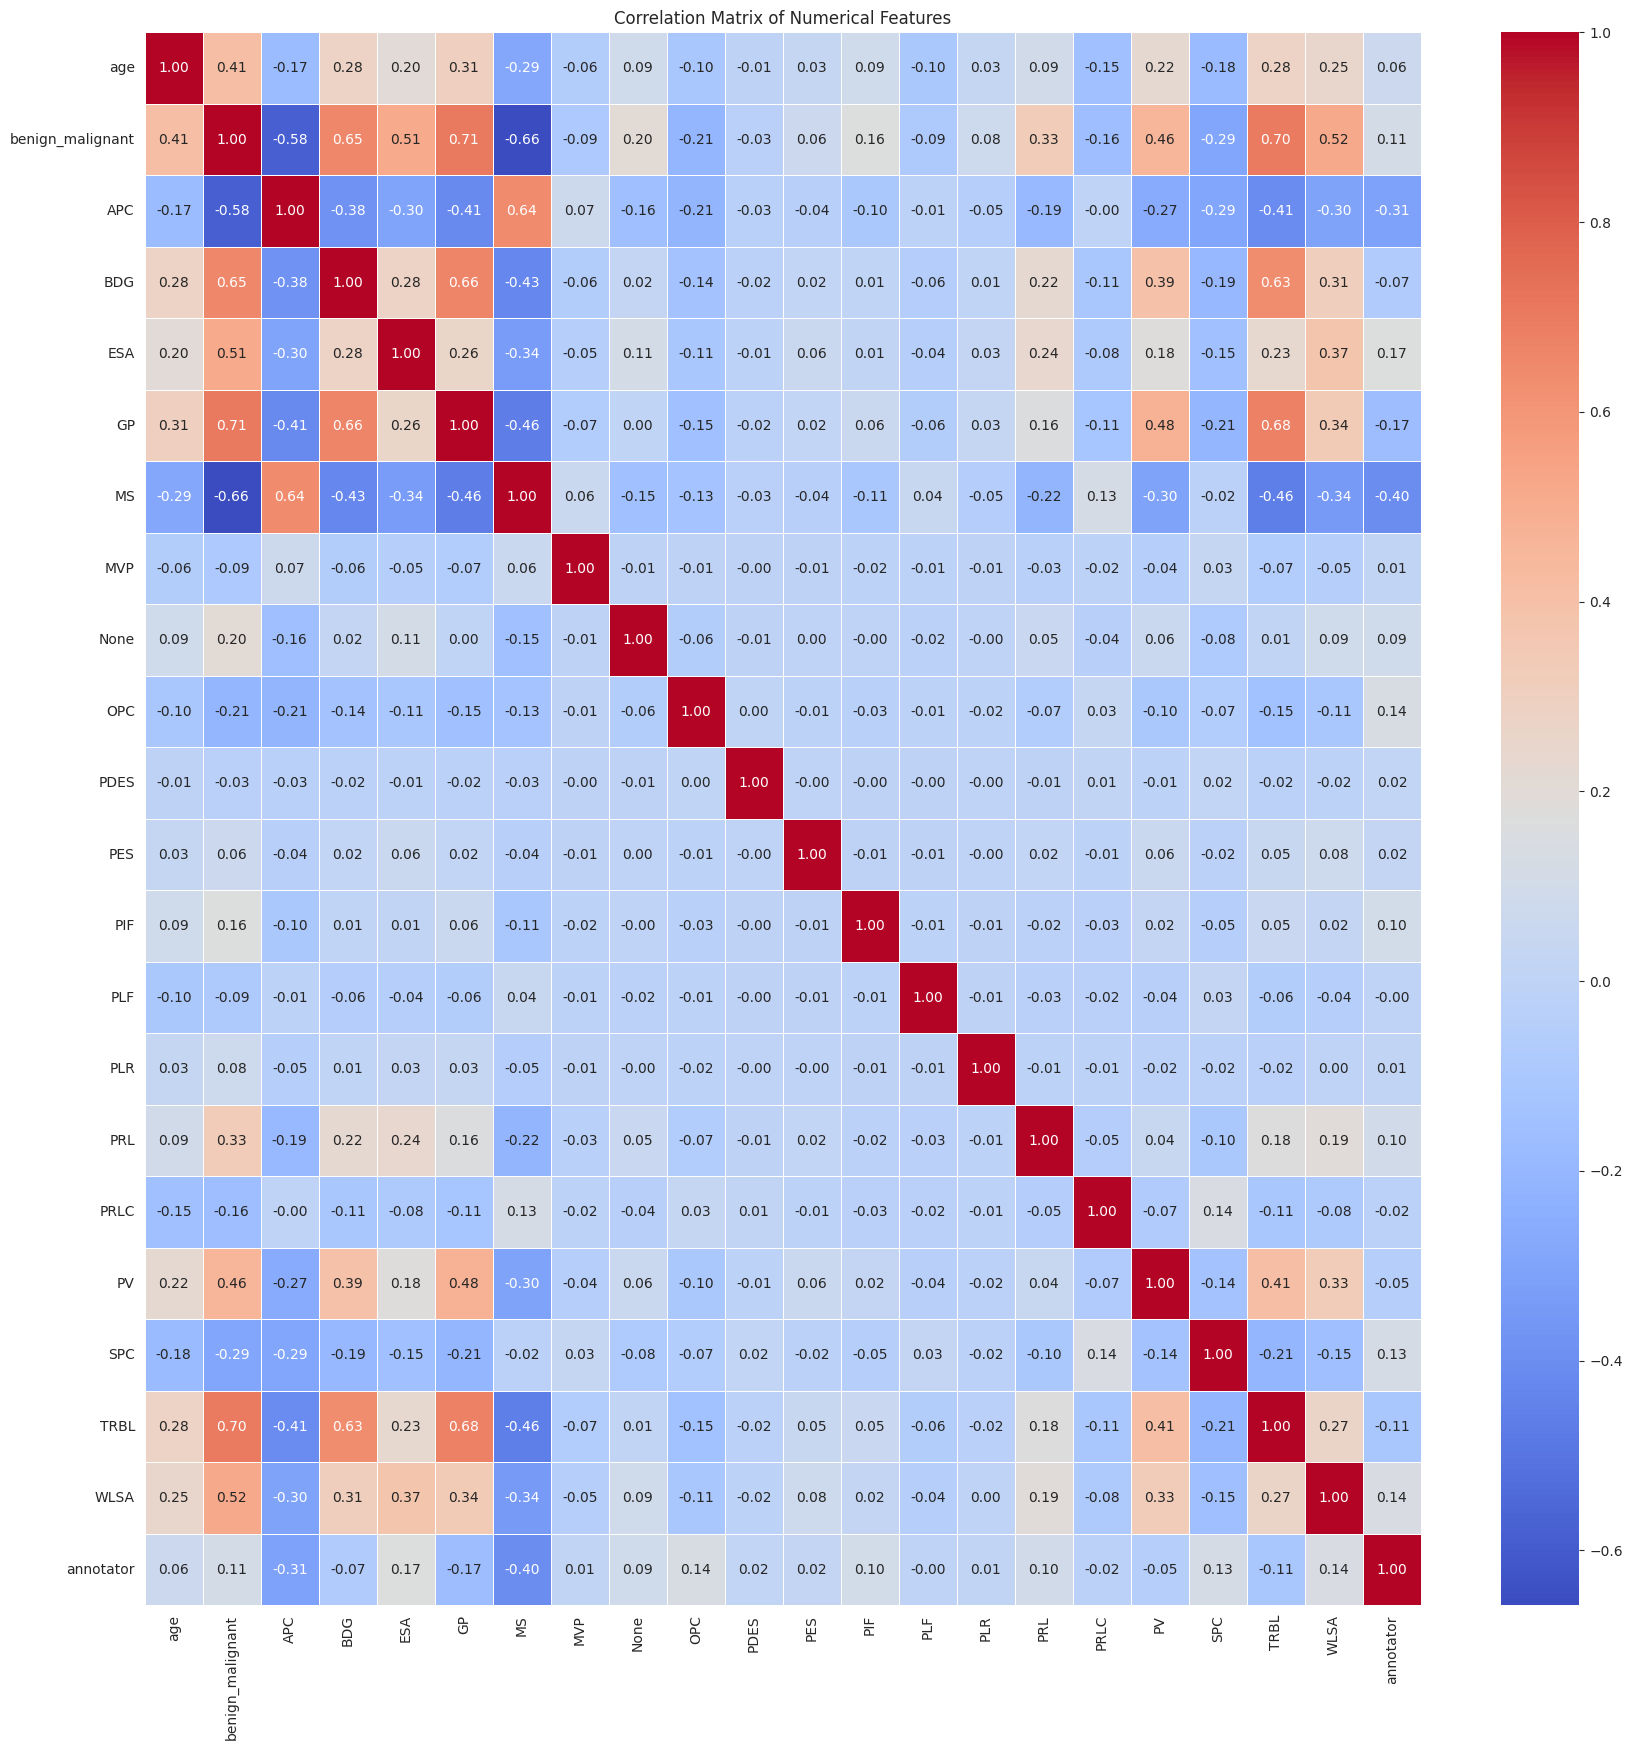

In [13]:
if len(numerical_cols) > 1:
    # It's often better to calculate correlation on a dataframe with no NaNs,
    # or be aware of how `corr()` handles them (pairwise deletion by default).
    # For simplicity here, we'll use the original df.
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(max(8, len(numerical_cols)*0.8), max(6, len(numerical_cols)*0.8)))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()